# Introduction

Familiarizing myself with methods to handle missing data with Python then build a binary classification model to predict which patient has diabetes.

Goal here is to review methods in the preprocessing/cleaning data and review classification models.

*_Note: Codes may also come from other sources for practice/workflow. Informational links have been added at the bottom of the notebook._

## What else do I hope to achieve from this?

Develop a stronger understanding in data cleaning, understand why data is missing in the first place, and review methods on how to handle missing values. Also, since I'm going to be attempting some medical deep learning problems in the future, I could get a tiny idea on how to better work with medical data.

Answer some of these questions below:
- What kind of method is better to use to fill missing values?
- Is one method better than another?
- What are the risks in our methods?
- If predicting, does filling missing values help our models?

## Framing the problem

Can you predict which patient has diabetes?

### Data

The data we will be using is the Pima Indians Diabetes dataset (introductory level). This dataset was originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It was also presented as a Kaggle problem where the objective was to predict the onset of diabetes whether a patient has diabetes or not based on certain diagnostic measurements.

There are several constraints that we should know when dealing with the data. All patients here are females at least 21 years old of Pima Indian heritage.

### Background Information

The [Pima](https://www.britannica.com/topic/Pima-people) people are North American Indians who traditionally lived in Arizona, U.S., in what was the core area of the prehistoric Hohokam culture. They were traditionally sedentary farmers that hunted and gathered to supplement their diet. During the drought years, jackrabbits and mesquite beans became the group's dietary staples. This was the result due to the drought years where only 20% of their crops were good to harvest. With the loss of an important part of their nutrition, the sustainability of their bodies slowly deteoriated as time went on due to the lack of nutrients. Together with a steady decline in physical activity, the chances for them to develop type 2 diabetes have increased dramatically.

### Characteristics

__Dimensions__
- 768 women (row) and 8 characteristics (col)

__Features__
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)
    - Our dependent variable (target)

__Additional Notes__
- Some values are not within the specified range where they are supposed to be so they can be treated as missing values

## Machine Learning Framework

1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use
2. Collecting relevant information and data
    - What type of data do we have?
    - Can we use any complimentary data with that is public that will help our with our analysis/modeling?
    - What other data requirements are there?
    - What is considered a success for this problem?
    - What libraries do we need?
        - How do we know if our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away?
    - Can the data be plotted?
    - What changes do we need in order to make the data usable if it's not already?
    - This step is not really an isolated step as it can encompass exploratory, feature engineering + more
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Modeling & scoring
    - Splitting the data into train and test sets
        - Always make sure you have a completely separate data to test your final model on after hyperparameter tuning and training has been done
        - Think about your experimental design beforehand so that you minimize unrelated sources of variation and reduce as much data leakage (if any) as possible
    - Normalizing the data to be on similar scales
        - Normalization, standardization methods (Z-score, minmax, median)
    - Create baseline, pre-tuned, and tuned models (includes cross-validation)
        - Create easy to more complex models if needed (think about computational cost, complexity, explainability)
    - Hyperparameter tuning
    - Fit cross-validated tuned models using best hyperparameters
    - Score model and get results
8. Evaluation
    - How accurate are the models?
        - Are the models overfitting or underfitting?
    - What evaluation metric are we using?
    - Is the final model good enough?
    - Which features are important?
    - Iterate steps if we are proceeding with specific features selected
        - Dimensionality reduction methods (PCA, LDA) to see if we can reduce model complexity (this step can be before modeling as well)
9. Results
    - What's our conclusion?
    - What actions are we going to take?
10. Ending notes
    - Extra information that we may not go over like steps that we did not go into or missed
        - Any other possible methods/solutions that we could look at in the future

## Method of Evaluation

Since this is a binary classification problem, we will start our baseline model using a logistic regression algorithm. 

The evaluation method will be the F1 Score which is the weighted average of recall and precision. This is a better measure to seek a balance between precision and recall vs. accuracy especially when there there is a higher risk in misdiagnosing a patient. We will also take a look at the ROC curve, accuracy, sensitivity, and specificity scores as well. 

Here are some performance metrics used in the confusion matrix below:

- TP - correct positive prediction
- TN - correct negative prediction
- FP - Type I Error (case negative but predicted positive)
- FN - Type II Error (case positive but predicted negative)
- Accuracy
    - (TP + TN)/Total
- Precision - how accurate is the model of those predicted positive that are actually positive
    - TP/(TP + FP)
- Recall / Sensitivity / TPR (True Positive Rate) - how many actual positives the model labeled over the total positives
    - TP/(TP + FN) which is also TP/All P
- Specificity (True Negative Rate) - number of correct negative predictions
    - TN/(TN + FP) which is also TN/All N
- F1 Score - weighted average of TPR (Recall) and Precision, useful if there is uneven class distribution like cancer detection where there can be 10,000 negatives and only 1 positive or if there is a higher risk if false negatives or false positives
    - 2 * ( (Pr * Rc) / (Pr + Rc) )
- ROC Curve
    - Graph used to summarize the performance at various thresholds by plotting the TPR against FPR
    
Here's a picture below by Chris Albon. Albon has easily digestable information on many related subjects for anyone who wants to take a look at his [website](https://chrisalbon.com/).

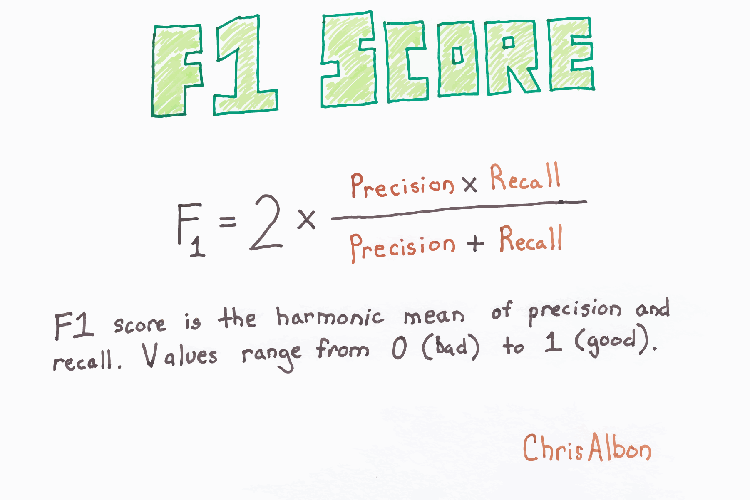

In [29]:
os.chdir('..')

from PIL import Image
Image.open('Images\\11-f1-score.png').resize((750,500))

## Overview of the Modeling Process

In order to see if patient has diabetes or not, we will use multiple classification algorithms to predict the outcome of 0 (negative) or 1 (positive). The employed classifiers are logistiic regression, decision trees, random forest, support vector machines, and extreme gradient boosting. 

After each performance of the machine learning method, we will begin evaluation where we will use 10-fold cross-validation as well, which is simply a procedure used to evaluate ML models where data is limited. In the cross-validation, data is resampled to best test our evaluation metric then averaged to get an overall score.

k-Fold Cross-validation
This is a popular cv method where the training dataset is split into k number of partitions (folds). If the dataset has 100 observationsand k =10 then there would be 10 folds each having 10 observations. Out of the 10 folds, 1 of them will be considered a test set and the rest for retraining purposes. Once that first split has been trained and tested, it will go on to the next random split of training, testing, and evaluation. After the end of the 10 splits, the results are averaged together to get a better idea of our model performance.

Generally, the steps of the procedure is as follows:
1. Training data is shuffled randomly
2. Training data is split into k groups
3. For each unique group:
    1. Take 1 group as a hold out or test set
    2. Take the remaining sets as the training set
    3. Fit a model on the training set and evaluate on the test set
    4. Retain the evaluation score
4. Summarize the skill of the model using the sample of model evaluation scores

More information on cross-validation can be found in the informational links below. Here's an image below on a 5-fold cross-validation.

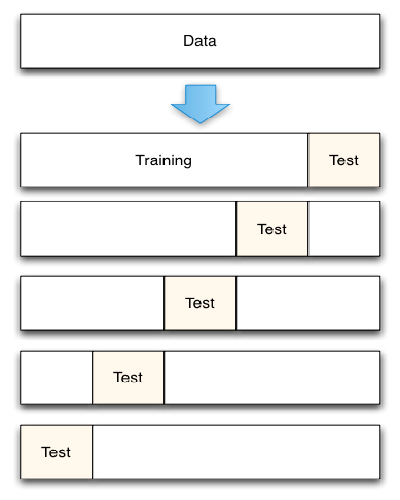

In [30]:
Image.open('Images\\10-cv.png').resize((400, 500))

## Collecting relevant data

In [31]:
# # Setting directory using os.path.join
# import os
# folder_path = 'Data\\'
# data_path = os.path.join(folder_path, '11-diabetes.csv')
# data = pd.read_csv(data_path)

In [32]:
# Set directory
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 '09-house-regression-env.db',
 '09-house-test.csv',
 '09-house-train.csv',
 '10-vgsales.csv',
 '11-diabetes.csv']

### Import libraries

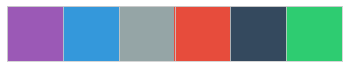

In [33]:
# Toolbox
import pandas as pd
import pandas_profiling
import numpy as np
import random
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p
from scipy import stats

# Misc
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows =1000

# Set notebook colors and palette
flatui = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
sns.set_style('white')
sns.set_color_codes(palette='deep')
# Favorite code to use: #34995e

### Import data

In [34]:
data = pd.read_csv('11-diabetes.csv')

## Preprocessing

Let's take a look at the data and see the structure of the data. It's good to know how big our dataset is so we are careful in using certain functions or plots and making sure we keep in mind our memory usage. Besides that, we will also be looking for missing values as well to get an idea on how complete the data is. We can create summary and diagnostic plots to show this. The less missing values the better, but one of our goals in this notebook is to go through difference methods in cleaning up missing values in the first place and try to understand why are they missing in the first place.

In summary, some of the questions we try to answer here are:
- Are we able to use the data right away?
    - If not, why?
- Are there any missing values?
    - If not, what methods should we use to fix this?
- How clean is the dat?
    - Are all values the same in a single feature?
    - Is the feature format consistent?

In [35]:
'''

Some basic functions:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''
print('')

In [36]:
# Let's take a look at the top 5 rows of the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Shape of the data
data.shape

(768, 9)

### Training vs. Testing Datasets

While we are preprocessing our data and making it usable, we also have to keep in mind the best practice machine learning methodology. We can't forget that in order to evaluate our models we have to have a holdout set or test set to check. So far from what I've seen in a lot of workbooks miss this step entirely because there is an assumption that the method train_test_split() from the sklearn library would suffice. This would cause something called data leakage that I'll go over in the next block.

The true way to mimic real-world problems is to completely leave out the test set in all preprocessing, cleaning,  and feature engineering steps. If there are changes to the training set then we would have to do the same transformations on the test as well. If we are imputing with using values from the training then we also have to with the test set.

For the sake our 2 goals, working with methods in cleaning missing values and going over algorithms for review, we are just going to split the data before we model.

### What is data leakage?

When information from outside of the training dataset is used to create the model. That is data leakage.

Leakage can cause you to create overly optimistic if not completely invalid predictive models because additional information can allow the model to learn from or know something that it otherwise would not know, which will in turn invalidate the estimated performance of the model being constructed. - Jason Brownlee

In other words, you know information of your test beforehand and then attempt to study & learn (train) on that same test and get scored on it with features used (time studied, material used, etc.) on a "new" test data (the same dataset you learned from) then get a test score on that to check your grade (evaluation & performance). So did you really something?

Techniques to minimize data leakage when building models - 
1. Perform data preparation within your cross-validation folds
    - One solution for this is that we can re-prep the data within your cross-validation folds including tasks like feature selection, outlier removal, encoding, feature scaling, and projection methods for dimensionality reduction
2. Hold back a validation dataset for final sanity check of your developed models
    - This approach splits your training dataset into 2 sets (1 train and 1 validation) and then save the validation dataset for use after the models have been created
    - Once created, you can validate the performance on the validation set
3. Create 4 datasets (something new that I haven't tried yet)
    - Initial training on the first set
    - Hyperparameter tuning on the second set
    - Validate scores on the third set using tuned hyperparameters on the third set
    - Test final model and evaluate on the final set

Common data preparation issues
1. Normalization or standardization on your entire dataset and then estimating the performance of your model using cross-validation
    - When this happens, the test data's information is being added into the training information so when we start testing, it's not a true representation of unknown/future data
    - An example is when you attempt to rescale the data on the same distribution of data, which includes the test set, and then use those values as inputs in your model

### Missing values

There are several methods on how to handle missing values as there are always some instances where a particular value is absent for real-world data. Reasons like corrupt date, failure to load the information correctly, never inputting the data values in the first place, or other invalid methods of data collections are all ways values are missing. It's extremely helpful to know a few methods on how to handle NaN values. Pandas library also provides a dropna() function that can be used to drop columns or rows of missing data.

But first let's check if are there any missing values then show the column names.

In [38]:
# Get missing values
mv_cols = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['Missing Count'])
mv_cols_pct = pd.DataFrame(round(data.isnull().sum().sort_values(ascending=False)*100/len(data),2), columns=['Missing Pct'])

# Combine the two dataframes (axis=1) with column names using the key parameter
mv_cols_df = pd.DataFrame(pd.concat([mv_cols, mv_cols_pct], axis=1))

# Get missing features only
all_mv = mv_cols_df[mv_cols_df['Missing Pct']>0]

# Print
print('There are', len(all_mv), 'columns with missing values.')
all_mv

There are 0 columns with missing values.


,Missing Count,Missing Pct


### There are no missing values, so we're good right?

So from our initial missing value check, there are actually no missing values in the small dataset so we are good right? Not quite. Let's take a look at the actual data now to figure out what's considered invalid in the dataset. Always be skeptical. This process helps you understand the data better and it's even better when you have domain knowledge to see uncommon data values where someone else may not notice as incorrect.

Let's start using some of the functions to check out the dataset.

In [39]:
# Summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
# Get columns with 0 values
data.describe().iloc[[3,4], 0:6]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3


Without any prior knowledge on knowing what is considered a correct value of 0 or not, we can see that these 5 features may look like it's invalid. 

For pregnancies, the value of 0 makes sense, but the other 5 features do not make any sense. Here are the 5 columns that we need to look into.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)

Now that we have our features, let's continue.

### Let's first update the zeros

In [41]:
# Identify columns
mv_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Identify how much zeros we have per feature
(data[mv_cols]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

So now we have counted the 5 features that have zero values as input. We want to identify the issues on why each of the features have zeros in the first place. It's not like someone can have 0 insulin or can they? Now a new question arises, can insulin be zero?

### Insulin

... is an important hormone that controls many processes in the body. It's a hormone secreted by an organ called the pancreas. Its main role is to regulate the amount of nutrients circulating in the bloodstream. When we eat a meal that contains carbohydrates, the amount of blood sugar in the bloodstream increases. The pancreas detects the increase of sugar, which then releases insulin into the blood to reduce the amount of sugar in the blood. When insulin levels fall too low, the body does not have enough energy to function fully. A person with diabetes may take insulin shots because their body is resistant to insulin or because it does not produce enough to support them.

So to answer the question biologically, yes you can but the chances that you have zero insulin means you have Type 1 Diabetes since the pancreas does not produce insulin but that would most likely mean that the patient is going to be in critical condition because the body needs insulin. For this dataset, it will be nearly impossible for the levels to be zero, so we can consider this as a missing value.

__SkinThickness__ is another feature that is skeptical. How can thickness be zero? That alone is a red flag and I will consider it as an incorrect data input or missing value.

The other 3 features: __glucose__, __blood pressure__, and __BMI__ are also all features that can't be zero based on human biology. For gluclose, low blood sugar (hypoglycemia) occurs in people with diabetes when the sugar (type of glucose) level drops below what the body needs to function normally. Unless those 5 patients were extremely sick during the time of the test then I would also consider this as a input error or missing value.

In [42]:
# Replace the zero values with NaN
data[mv_cols] = data[mv_cols].replace(0, np.NaN)

In [43]:
# Count the NaN values, they should be the same
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [44]:
# Get missing values
mv_cols = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['Missing Count'])
mv_cols_pct = pd.DataFrame(round(data.isnull().sum().sort_values(ascending=False)*100/len(data),2), columns=['Missing Pct'])

# Combine the two dataframes (axis=1) with column names using the key parameter
mv_cols_df = pd.DataFrame(pd.concat([mv_cols, mv_cols_pct], axis=1))

# Get missing features only
all_mv = mv_cols_df[mv_cols_df['Missing Pct']>0]

# Print
print('There are', len(all_mv), 'columns with missing values.')
all_mv

There are 5 columns with missing values.


,Missing Count,Missing Pct
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65


Now we have our missing values to work with.

### Types of missing values

__Structurally missing data__
- Data that is missing for a logical reason like having no children and asking for the age of their youngest child

__MCAR__ (Missing Completely at Random)
- There is a no specific pattern on why data values are missing and are considered statistically independent. In other words, we are assuming that whether or not the person has missing data is completely unrelated to the other information in the data. When data is missing completely at random, it means that we can undertake analyses using only observations that have complete data only if we have enough observations for the model.
    - Solution 1: Can delete records
    - Solution 2: Can stochastically impute rather than deterministically impute. This means that if you specific the marginal probability distribution of a missing value as Gaussian with some known mean and variance then you can sample from that distribution to impute values into the data

__MAR__ (Missing at Random)
- The probability distribution of the missing values is functionally dependent upon the observable component of the record. MCAR is a type of MAR. For this type of missing value, we can attempt to predict a value based on a predictive model unlike MCAR, but keep in mind that we can't perfectly predict a relationship. It requires a probablistic relationship (ex: we have a better than radnomly probability of predicting the true value of the missing data).
    - Solution 1: Can use an algorithm

__MNAR__ (Missing Not at Random)
- The probability that the answer is observable is conditionally dependent upon the unobservable component of the data record. In other words, the refusal to input data or a bad experimental design which led to a bad sampling of patients which makes this as a nonignorable missing data. 
    - Solution 1: Can include binary indicators in the data record which explicitly identifies when a variable is not observable (method I use often). Challenges from this method is that a highly nonlinear model needs to be designed to properly integrate the new information in an appropriate manner. 

### Other Notes
When data is missing not at random, it means that we can't use any of the standard methods for dealing with missing values (imputation, algorithms). If the missing data is missing not at random, any standard calculations would give the wrong answer. 

For example, if there was a case study on homeless people in a shelter with 10 individuals, then we can see how many have left the shelter. If only 5 was located and 2 of them were out of the shelter, then it would be 2/5 but what about the other 5 that can't be contacted? Would it be 7/10 instead because 40% < 70%. Reporting 40% may be misleading. In this example, the missing data is nonignorable so treating it as a missing as random would also be inappropriate.

__Summary: Possible solutions__
1. Imputing with mean, median, or mode with fillna() or Imputer() pre-processing class
    - data.fillna(data.mean(), inplace=True)
    - Preprocessing class
        - imputer = Imputer()
        - transformed_vals = imputer.fit_transform(data.values)
        - np.isnan(transformed_vals).sum() # Check
2. Create a separate binary feature indicating if the value is missing or not
3. Binning
    - This could be similar to the second solution as we are grouping the values together either within a numerical range or based on a specific condition
    - Issue from this method is that you may lose information from this
3. Use an algorithm to predict the missing value
    - Imputing with a model's estimated prediction
4. Use an algorithm that doesn't require the data to be imputed
    - Decision trees, random forest, KNN, etc.
5. Removing the data     
    - Using an index or dropna() function
        - data.dropna(inplace=True)
    - Use the inplace parameter, if True, do operation inplace and return None
    - Use the axis parameter, drop labels from the index level(then 0) or column level (then 1)
6. Use business acumen to figure out values


### So what's the classification of each of our missing data of the features? 

If we are unable to figure it out right away, it's best to start exploring the data first before we can attempt one of our methods.

## Exploratory data analysis

### Let's plot the missing data now that we are exploring

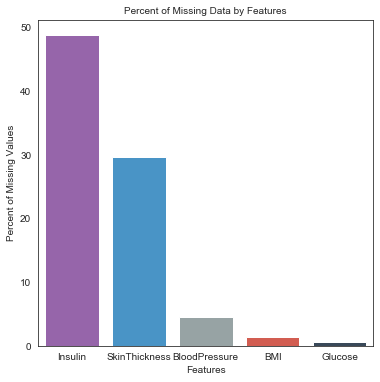

In [45]:
# Create figure space
fig = plt.figure(figsize=(6, 6))

# Create bar plot
fig = sns.barplot(x=all_mv.index,
                  y='Missing Pct',
                  data=all_mv)

# Set plot features (seaborn we use set methods vs. plt methods for matplotlib)
plt.xticks(rotation='0')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of Missing Values', fontsize=10)
plt.title('Percent of Missing Data by Features', fontsize=10)
plt.show()

We can see that 2 features represent almost 80% of the missing data. Also, the plot may be a little misleading because the bars are very large but relatively it's not that bad so we will rescale it in the next plot.

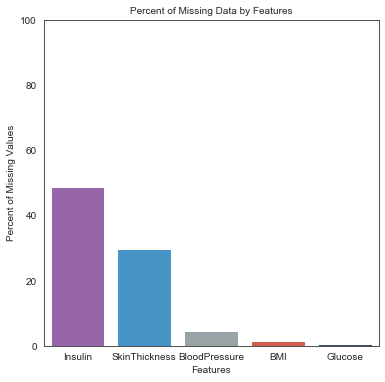

In [46]:
# Create figure space
fig = plt.figure(figsize=(6, 6))

# Create bar plot
fig = sns.barplot(x=all_mv.index,
                  y='Missing Pct',
                  data=all_mv)

# Set plot features (seaborn we use set methods vs. plt methods for matplotlib)
plt.xticks(rotation='0')
plt.ylim(0,100)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of Missing Values', fontsize=10)
plt.title('Percent of Missing Data by Features', fontsize=10)
plt.show()

Compare the differences between the two plots. Data visualization is a crucial soft skill to have as we want to present the data to be as accurate and compelling as possible for our audience to perceive the idea of what we are attempting to inform them of. 

Here's a small excerpt in my other [notebook](https://github.com/davidtnly/Python/blob/master/MachineLearning/10-video-games-regression-modeling.ipynb).

### Data storytelling 
Data storytelling can be a whole notebook by itself on best practices on what can be done to craft a more compelling story behind our analyses to uncover insights and drive action. Remember that all the work we do is really just a subset of a giant interdisciplinary field and for me, this subset involves behavioral economics (we are all irrational), psychology (behavioral, neuroscience), decision science, and much more!

Take a look at some of these links about data storytelling/data visualization:
- [Storytellingwithdata](http://www.storytellingwithdata.com/)
- [Data Storytelling as an essential skill](https://www.forbes.com/sites/brentdykes/2016/03/31/data-storytelling-the-essential-data-science-skill-everyone-needs/#6e2ba8e652ad)
- [Few examples](https://twooctobers.com/blog/8-data-storytelling-concepts-with-examples/)

With that note, hopefully our audience would be more engaged in this after seeing the second plot and will keep in mind how to present their data in a more meaningful way. In this case, there isn't a lot of missing values on 3 of the 5 features based on this plot above. 

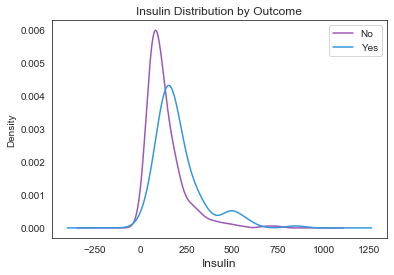

In [49]:
# Create figure space
plt.figure(figsize=(6,4))

# Plot
data.Insulin[data.Outcome==0].plot(kind='kde')
data.Insulin[data.Outcome==1].plot(kind='kde')

# Set plot features
plt.xlabel('Insulin', fontsize=12)
plt.title('Insulin Distribution by Outcome', fontsize=12)
plt.legend(('No', 'Yes'), loc='best')
plt.show()

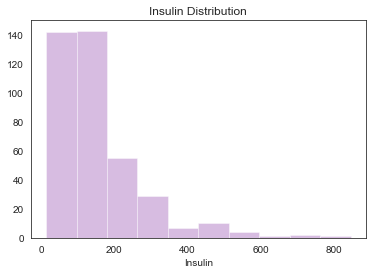

In [53]:
# Create figure space
plt.figure(figsize=(6,4))

# Create plot
sns.distplot(data.Insulin, bins=10, kde=False, rug=False, norm_hist=False)

# Set plot features
plt.title('Insulin Distribution')
plt.show()

So what exactly is considered a normal insulin level? If you are fasting then your blood sugar levels should be under 100 mg/dL and levels between 100 - 125 indicate pre-diabetes. We can see from the density chart on people who have diabetes also have a slight shift in the higher levels of insulin which makes sense. Levels equal to or greater than 126 mg/dL are diagnostic for diabetes. In the histogram, we could expect that everyone within those levels would have a higher chance to be classified as diabetic.

### Correlation map

We still don't know the cause on why Insulin would have such a large discrepancy in missing data vs. the other columns especially knowing that Insulin can be a big factor for the diagnostics. We will create a heatmap to see if there is some correlation between the features especially Insulin.

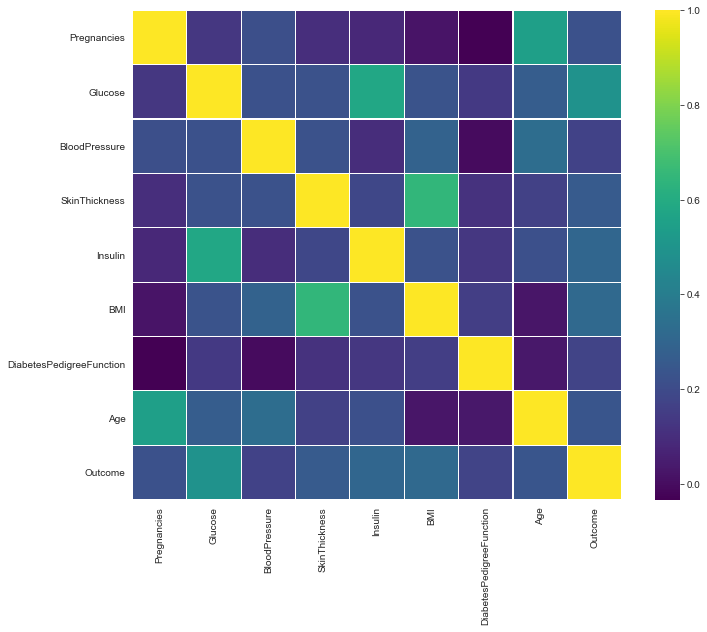

In [54]:
# Create a figure space
plt.subplots(figsize=(12,9))

# Create matrix
corr_plot = sns.heatmap(data.corr(),
                        cmap='viridis', # YlGnBu, RdBu_r
                        linewidths=0.20,
                        linecolor='white',
                        vmax=1,
                        square=True,
                        fmt='.1g',
                        annot_kws={"size": 12})
corr_plot
plt.show()

In [55]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


- We see that Insulin and Glucose are moderately correlated vs. the rest of the features. 
- Age and Pregnancies are pretty correlated as well.
- BMI and SkinThickness
- The highest correlated feature with Outcome is Glucose

### So the missing data types are...
- Insulin
    - MNAR, could be a sign of a bad experimental design (sampling)
- SkinThickness
    - MNAR, could be a sign of a bad experimental design (sampling)
- BloodPressure
    - MCAR, there's no clear pattern on why the data is missing
- BMI
    - MCAR, there's no clear pattern on why the data is missing
- Glucose
    - MCAR, there's no clear pattern on why the data is missing

In [60]:
# Check all BloodPressure missing values
data[data.BloodPressure.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,0.0,0.0,35.3,0.134,29,0
15,7,100.0,NaN,0.0,0.0,30.0,0.484,32,1
49,7,105.0,NaN,0.0,0.0,NaN,0.305,24,0
60,2,84.0,NaN,0.0,0.0,NaN,0.304,21,0
78,0,131.0,NaN,0.0,0.0,43.2,0.270,26,1
81,2,74.0,NaN,0.0,0.0,NaN,0.102,22,0
172,2,87.0,NaN,23.0,0.0,28.9,0.773,25,0
193,11,135.0,NaN,0.0,0.0,52.3,0.578,40,1
222,7,119.0,NaN,0.0,0.0,25.2,0.209,37,0
261,3,141.0,NaN,0.0,0.0,30.0,0.761,27,1


All missing BloodPressure data does not have Insulin measured as well. This is where someone with knowledge of the dataset collection process or maybe someone who has experience in medical procedures like this could be helpful. Is the collection of BloodPressure and Insulin similar? From a visual perspective, I can't identify any trends on why the data would be missing.

Looking at this more closely, just from this set of data there are actually a lot of pregnancies. For example, on row 357, there is someone that has been pregnant 13 times by the age of 44. That is actually pretty amazing. The Pima culture is definitely different compared to just having 1-4. 

In [61]:
# Check all BMI missing values
data[data.BMI.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,0.0,0.0,NaN,0.232,54,1
49,7,105.0,NaN,0.0,0.0,NaN,0.305,24,0
60,2,84.0,NaN,0.0,0.0,NaN,0.304,21,0
81,2,74.0,NaN,0.0,0.0,NaN,0.102,22,0
145,0,102.0,75.0,23.0,0.0,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,0.0,0.0,NaN,0.256,25,0
494,3,80.0,NaN,0.0,0.0,NaN,0.174,22,0
522,6,114.0,NaN,0.0,0.0,NaN,0.189,26,0
684,5,136.0,82.0,0.0,0.0,NaN,0.640,69,0


Out of the total missing values, only 2 of them have been diagnosed with diabetes. Let's use that knowledge and see what the average BMI levels between the two outcomes.

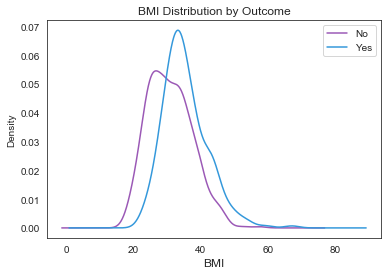

In [65]:
# Create figure space
plt.figure(figsize=(6,4))

# Plot
data.BMI[data.Outcome==0].plot(kind='kde')
data.BMI[data.Outcome==1].plot(kind='kde')

# Set plot features
plt.xlabel('BMI', fontsize=12)
plt.title('BMI Distribution by Outcome', fontsize=12)
plt.legend(('No', 'Yes'), loc='best')
plt.show()

In [66]:
data.groupby('Outcome').BMI.mean()

Outcome
0    30.859674
1    35.406767
Name: BMI, dtype: float64

So BMI levels are higher when diabetes is diagnosed. I would want to see if an algorithm would be able to fill in the missing values especially because SkinThickness looks closely correlated, but there are a lot of missing values in that feature.

In [62]:
# Check all Glucose missing values
data[data.Glucose.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,0.0,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,0.0,32.0,0.389,22,0
349,5,NaN,80.0,32.0,0.0,41.0,0.346,37,1
502,6,NaN,68.0,41.0,0.0,39.0,0.727,41,1


## Feature engineering / Cleanup

This is a step where we could attempt to be more creative on adding or changing up features. We always want the best preditors as possible for our models so we could most likely create features that will indicate missing values in Insulin and SkinThickness or we can revert it back to zero (which isn't really feature engineering).

In [58]:
data.Insulin = data.Insulin.fillna(0)

In [59]:
data.SkinThickness = data.SkinThickness.fillna(0)

In [ ]:
# BloodPressure

In [ ]:
# BMI

In [ ]:
# Glucose

In [70]:
# Create a SkinThickness to Age Ratio
data['SkinToAgeRatio'] = data.SkinThickness/data.Age

# Check all SkinThickness
data[data.SkinThickness>0].head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinToAgeRatio
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1,0.700000
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0,0.935484
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1.095238
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1.060606
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1.230769
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,0.849057
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,0.389831
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1,0.372549
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,1.516129
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0,1.151515


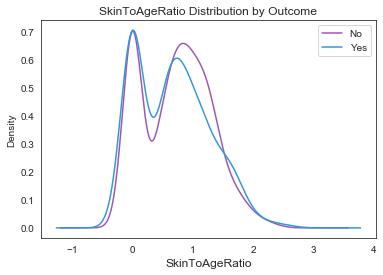

In [71]:
# Create figure space
plt.figure(figsize=(6,4))

# Plot
data.SkinToAgeRatio[data.Outcome==0].plot(kind='kde')
data.SkinToAgeRatio[data.Outcome==1].plot(kind='kde')

# Set plot features
plt.xlabel('SkinToAgeRatio', fontsize=12)
plt.title('SkinToAgeRatio Distribution by Outcome', fontsize=12)
plt.legend(('No', 'Yes'), loc='best')
plt.show()

## Pre-modeling cleanup

### Check up nulls

### Check skews

### Which transformation should we use on the features?

## Modeling & scoring

## Evaluation

## Results

## Ending notes

### Informational links

- [Cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/)
- [Data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/)
- [Types of missing data](https://stats.stackexchange.com/questions/391602/how-to-handle-missing-data-in-machine-learning)
- [How to handle missing data in ML](https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651)
- [Handle missing data with python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Ways to handle missing values](https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/)
- [Working with missing data](https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce)
- [Blind spots](https://www.mailgun.com/blog/avoiding-the-blind-spots-of-missing-data-with-machine-learning)
- [Machine learning applications in cancer prognosis and prediction](https://www.sciencedirect.com/science/article/pii/S2001037014000464)